# Download Dataset from Drive

In [0]:
!wget --header="Host: doc-10-9c-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/my-drive" --header="Cookie: AUTH_4lgch8kproorp87c5erpsi9rqpbk46dg_nonce=q6hk4to3ac9cg" --header="Connection: keep-alive" "https://doc-10-9c-docs.googleusercontent.com/docs/securesc/0ga3her86at4fpdr2b9n3spfq1b4g359/4jv66eeavbfpfeg0iabhc09cp8torhhm/1552140000000/14696292948499217652/14696292948499217652/11P0neVvfVrReXes7ldnX168zqtNl_Zsg?e=download&h=06864318269717761326&nonce=q6hk4to3ac9cg&user=14696292948499217652&hash=np5lov0mg4o889s8gqpq6nq21sm3smeu" -O "lfw.zip" -c

--2019-03-09 15:55:11--  https://doc-10-9c-docs.googleusercontent.com/docs/securesc/0ga3her86at4fpdr2b9n3spfq1b4g359/4jv66eeavbfpfeg0iabhc09cp8torhhm/1552140000000/14696292948499217652/14696292948499217652/11P0neVvfVrReXes7ldnX168zqtNl_Zsg?e=download&h=06864318269717761326&nonce=q6hk4to3ac9cg&user=14696292948499217652&hash=np5lov0mg4o889s8gqpq6nq21sm3smeu
Resolving doc-10-9c-docs.googleusercontent.com (doc-10-9c-docs.googleusercontent.com)... 74.125.140.132, 2a00:1450:400c:c08::84
Connecting to doc-10-9c-docs.googleusercontent.com (doc-10-9c-docs.googleusercontent.com)|74.125.140.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-zip-compressed]
Saving to: ‘lfw.zip’

lfw.zip                 [          <=>       ] 180.43M  43.4MB/s    in 4.2s    

2019-03-09 15:55:16 (43.4 MB/s) - ‘lfw.zip’ saved [189193120]



In [0]:
!unzip 'lfw.zip'

Archive:  lfw.zip
   creating: lfw/
   creating: lfw/Aaron_Eckhart/
  inflating: lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg  
   creating: lfw/Aaron_Guiel/
  inflating: lfw/Aaron_Guiel/Aaron_Guiel_0001.jpg  
   creating: lfw/Aaron_Patterson/
  inflating: lfw/Aaron_Patterson/Aaron_Patterson_0001.jpg  
   creating: lfw/Aaron_Peirsol/
  inflating: lfw/Aaron_Peirsol/Aaron_Peirsol_0001.jpg  
  inflating: lfw/Aaron_Peirsol/Aaron_Peirsol_0002.jpg  
  inflating: lfw/Aaron_Peirsol/Aaron_Peirsol_0003.jpg  
  inflating: lfw/Aaron_Peirsol/Aaron_Peirsol_0004.jpg  
   creating: lfw/Aaron_Pena/
  inflating: lfw/Aaron_Pena/Aaron_Pena_0001.jpg  
   creating: lfw/Aaron_Sorkin/
  inflating: lfw/Aaron_Sorkin/Aaron_Sorkin_0001.jpg  
  inflating: lfw/Aaron_Sorkin/Aaron_Sorkin_0002.jpg  
   creating: lfw/Aaron_Tippin/
  inflating: lfw/Aaron_Tippin/Aaron_Tippin_0001.jpg  
   creating: lfw/Abbas_Kiarostami/
  inflating: lfw/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg  
   creating: lfw/Abba_Eban/
  inflating: lfw

# Loading Libraries and Exploring Dataset

**LOADING LIBRARIES**

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

from keras.layers import Dense, Dropout, Concatenate, Conv2D, Flatten, MaxPooling2D, Reshape, Input, Lambda
import os as os
from PIL import Image
from tqdm import tqdm
import tensorflow as tf
import keras.backend as K

import random

Using TensorFlow backend.


**LOADING DATASET**

In [0]:
len(os.listdir('lfw'))

5749

In [0]:
names = os.listdir('lfw')[:600]
X_first = []
X_sec = []
Y = []
for i in tqdm(range(len(names))):
  for j in range(len(os.listdir('lfw/'+names[i]+'/'))):
    img = image.load_img('lfw/'+names[i]+'/'+os.listdir('lfw/'+names[i]+'/')[j], target_size = (224, 224))
    first = np.array(img)
    first = preprocess_input(first)
    
    for k in range(j, len(os.listdir('lfw/'+names[i]+'/'))):
      img2 = image.load_img('lfw/'+names[i]+'/'+os.listdir('lfw/'+names[i]+'/')[k], target_size = (224, 224))
      sec = np.array(img2)
      sec = preprocess_input(sec)
      
      X_first.append(first)
      X_sec.append(sec)
      
      Y.append(1)
    
    for k in range(i+1, len(names), 80):      
      img3 = image.load_img('lfw/'+names[k]+'/'+os.listdir('lfw/'+names[k])[0], target_size = (224, 224))
      sec = np.array(img3)
      sec = preprocess_input(sec)
        
        
      X_first.append(first)
      X_sec.append(sec)
        
      Y.append(0)
        
X_first = np.array(X_first, dtype = 'uint8')
X_sec = np.array(X_sec, dtype = 'uint8')
Y = np.array(Y)

100%|██████████| 600/600 [00:25<00:00, 23.94it/s]


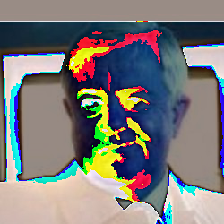

In [0]:
Image.fromarray(X_first[5], mode = "RGB")

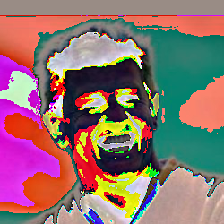

In [0]:
Image.fromarray(X_sec[5], mode = "RGB")

In [0]:
print(X_first.shape, X_sec.shape)
print(Y.shape)

(10791, 224, 224, 3) (10791, 224, 224, 3)
(10791,)


In [0]:
list(Y).count(1)

5591

In [0]:
Y[5]

0

# Building The Model

**BASE MODEL**

In [0]:
basemodel = ResNet50(include_top = False, input_shape = (224, 224, 3))
x = basemodel.output
x = Conv2D(128, (3, 3), strides = 2)(x)
x = Conv2D(128, (3, 3), strides = 1)(x)
x = Reshape((128, ))(x)
basemodel = Model(inputs = basemodel.input, outputs = x)
basemodel.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 4s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________

**MAIN MODEL**

In [0]:
def create_model():
    
  first = Input((224, 224, 3))
  sec = Input((224, 224, 3))
  
  first_enc = basemodel(first)
  sec_enc = basemodel(sec)
  
  L1_layer = Lambda(lambda tensors:K.abs(tensors[0]-tensors[1]))
  L1_dist = L1_layer([first_enc, sec_enc])
  
  out = Dense(1, activation = 'sigmoid')(L1_dist)
  
  
  print(out.shape)
  
  model = Model(inputs = [first, sec], outputs = out)
  return model

In [0]:
model = create_model()
model.summary()

(?, 1)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 128)          26094720    input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128)          0           model_1[1][0]                    
   

In [0]:
from keras.optimizers import Adam
opt = Adam(0.00006)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
model.fit(x = [X_first, X_sec], y = Y, epochs = 20, batch_size = 16, shuffle = True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
10791/10791 [==============================] - 687s 64ms/step - loss: 0.5336 - acc: 0.8074
Epoch 2/20
10791/10791 [==============================] - 665s 62ms/step - loss: 0.2579 - acc: 0.9065
Epoch 3/20
10791/10791 [==============================] - 663s 61ms/step - loss: 0.1781 - acc: 0.9439
Epoch 4/20
10791/10791 [==============================] - 661s 61ms/step - loss: 0.1158 - acc: 0.9682
Epoch 5/20
10791/10791 [==============================] - 653s 61ms/step - loss: 0.0977 - acc: 0.9751
Epoch 6/20
10791/10791 [==============================] - 652s 60ms/step - loss: 0.0838 - acc: 0.9806
Epoch 7/20
 9888/10791 [==========================>...] - ETA: 54s - loss: 0.1071 - acc: 0.9761

In [0]:
model.save_weights('epoch_20_0:50.h5')
#model.save_weights('drive/epoch_20_0:50.h5')

**CODE TO SAVE FILE IN DRIVE**

In [0]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131322 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [0]:
# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

In [0]:
# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
!wget --header="Host: doc-04-9c-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://drive.google.com/drive/my-drive" --header="Cookie: AUTH_4lgch8kproorp87c5erpsi9rqpbk46dg=14696292948499217652|1552104000000|2lnv792vso6f6qnc1dknhlt3oovn5p2r" --header="Connection: keep-alive" "https://doc-04-9c-docs.googleusercontent.com/docs/securesc/0ga3her86at4fpdr2b9n3spfq1b4g359/57a5723cr551c8g4saeu1jod588u8989/1552104000000/14696292948499217652/14696292948499217652/1sZ2-j5TuOVocvfyz0StlNeScXL1NgDsK?h=06864318269717761326&e=download" -O "epoch_20_0_50.h5" -c

--2019-03-09 05:05:22--  https://doc-04-9c-docs.googleusercontent.com/docs/securesc/0ga3her86at4fpdr2b9n3spfq1b4g359/57a5723cr551c8g4saeu1jod588u8989/1552104000000/14696292948499217652/14696292948499217652/1sZ2-j5TuOVocvfyz0StlNeScXL1NgDsK?h=06864318269717761326&e=download
Resolving doc-04-9c-docs.googleusercontent.com (doc-04-9c-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-04-9c-docs.googleusercontent.com (doc-04-9c-docs.googleusercontent.com)|74.125.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘epoch_20_0_50.h5’

epoch_20_0_50.h5        [     <=>            ]  99.77M  64.1MB/s    in 1.6s    

2019-03-09 05:05:25 (64.1 MB/s) - ‘epoch_20_0_50.h5’ saved [104615060]



**TESTING THE MODEL**

In [0]:
model.load_weights('epoch_20_0_50.h5')

In [0]:
img = image.load_img('devansh.jpg', target_size = (224, 224))
anc = image.img_to_array(img)
anc = preprocess_input(anc)
anc = np.expand_dims(anc, axis=0)


img2 = image.load_img('dhruv.jpg', target_size = (224, 224))
pos = image.img_to_array(img2)
pos = preprocess_input(pos)
pos = np.expand_dims(pos, axis=0)

img3 = image.load_img('devansh.jpg', target_size = (224, 224))
neg = image.img_to_array(img3)
neg = preprocess_input(neg)
neg = np.expand_dims(neg, axis=0)

first = model.predict([anc, pos], verbose=True)
sec = model.predict([anc, neg], verbose = True)

print(first)
print(sec)

1/1 [==============================] - 0s 72ms/step
[[0.28496146]]
[[0.5]]
